# Рубежный контроль №2
Работа Шушпанов В.О., группа ИУ5-62Б, Вариант 21
задача №2
Кластеризуйте данные с помощью двух алгоритмов кластеризации. Алгоритмы для студентов группы ИУ5-62Б: MeanShift и иерархическая кластеризация. Сравните качество кластеризации с помощью следующих метрик качества кластеризации (если это возможно для Вашего набора данных):
Adjusted Rand index
Adjusted Mutual Information
Homogeneity, completeness, V-measure
Коэффициент силуэта
Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных. Набор данных: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from IPython.display import Image
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, AgglomerativeClustering
from itertools import cycle, islice
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
for x in wine:
    print(x)

data
target
target_names
DESCR
feature_names


In [4]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
# Имена меток
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [7]:
x_axis = wine.data[:, 0]  
y_axis = wine.data[:, 1]

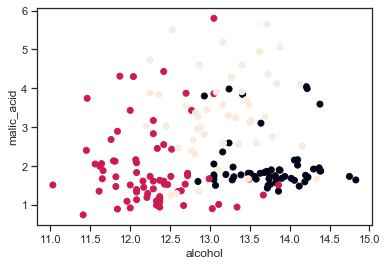

In [9]:
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.scatter(x_axis, y_axis, c=wine.target)
plt.show()

In [11]:
data = pd.DataFrame(data= np.c_[wine.data[:, 0], wine.data[:, 1]],
                     columns= ['total_phenols', 'color_intensity'])

In [12]:
data.head()

,total_phenols,color_intensity
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [13]:
data.shape

(178, 2)

In [14]:
def do_clustering(cluster_dataset, method):
    """
    Выполнение кластеризации для данных примера
    """
    temp_cluster = method.fit_predict(cluster_dataset)    
    return temp_cluster

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def claster_metrics(method, data, true_y):
    """
    Вычисление метрик кластеризации
    """
    result_Method = do_clustering(data, method)
    
    list = []
    list.append(adjusted_rand_score(true_y, result_Method))
    list.append(adjusted_mutual_info_score(true_y, result_Method))
    h, c, v = homogeneity_completeness_v_measure(true_y, result_Method)
    list.append(h)
    list.append(c)
    list.append(v)
    list.append(silhouette_score(data, result_Method))
    
    names = ['ARI', 'AMI', 'Homogeneity', 'Completeness', 'V-measure', 'Silhouette']
    for i in range(0,6):
        print('{}: {};'.format(names[i], list[i]))

## MeanShift

In [16]:
result_MeanShift = do_clustering(data, MeanShift())

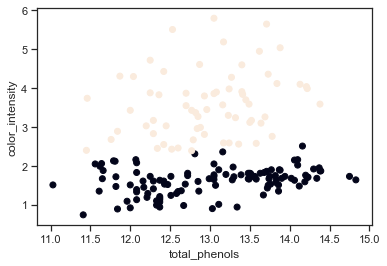

In [17]:
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c=result_MeanShift)
plt.show()

## Иерархическая кластеризация

In [18]:
result_AgglomerativeClustering = do_clustering(data, AgglomerativeClustering(n_clusters=3))

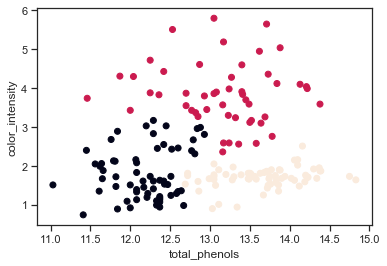

In [19]:
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c=result_AgglomerativeClustering)
plt.show()

## Сравнение качества кластеризации

In [21]:
claster_metrics(MeanShift(), data, wine.target)

ARI: 0.2078263855082377;
AMI: 0.2057073480395242;
Homogeneity: 0.1691746059020372;
Completeness: 0.27993382655743726;
V-measure: 0.21089648451780976;
Silhouette: 0.44340503519114244;


In [22]:
claster_metrics(AgglomerativeClustering(n_clusters=3), data, wine.target)

ARI: 0.41319890870525655;
AMI: 0.37689168864558503;
Homogeneity: 0.3845040280492958;
Completeness: 0.38235049318161735;
V-measure: 0.383424236761324;
Silhouette: 0.43555559807302957;
